In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [74]:
# loading source data
df_tickers = pd.read_csv("data/canadian_mutual_funds.csv")
df_tickers.head()

,ticker,regularMarketChange,netExpenseRatio,companyName,twoHundredDayMovingAvg,fundNetAssets,grossExpenseRatio,regularMarketChangePercent,fiftyTwoWeekChangePercent,fiftyTwoWeekLow,...,region,fiftyDayMovingAvg,fiftyTwoWeekHigh,performanceRatingOverall,trailing3mReturn,annualReturnNavY1,trailingYtdReturn,annualReturnNavY3,annualReturnNavY5,riskRatingOverall
0,0P0001AAMP.TO,1.179401,0.0,0P0001AAMP.TO,30.409174,68424856.0,0.0,2.923638,97.089210,21.06640,...,ca,38.315495,43.51000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0P0000SC5I.TO,0.786299,0.0,0P0000SC5I.TO,20.296726,68424856.0,0.0,2.922902,96.721730,14.07450,...,ca,25.557571,29.01900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0P0000ULFC.TO,0.657400,0.0,CI Gold Corporate Class E,17.047487,68424856.0,0.0,2.920325,94.862785,11.88970,...,ca,21.403690,24.29990,0.0,30.05714,29.68208,84.53591,1.00101,39.60875,0.0
3,0P0000SC5H.TO,0.665401,0.0,CI Gold Corporate Class A,17.267988,68424856.0,0.0,2.920041,94.512820,12.05720,...,ca,21.669962,24.60130,0.0,29.99681,29.46198,84.24477,0.83005,39.44220,0.0
4,0P000075X0.TO,4.043991,0.0,Ninepoint Gold and Precious Minrls Ser F,105.802940,239952073.0,0.0,2.792021,120.132280,67.63428,...,ca,140.933560,163.11287,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
ticker_list = df_tickers["ticker"].unique().tolist()
print(ticker_list)


len(ticker_list)


['0P0001AAMP.TO', '0P0000SC5I.TO', '0P0000ULFC.TO', '0P0000SC5H.TO', '0P000075X0.TO', '0P0001HHLA.TO', '0P00007224.TO', '0P0000KODJ.TO', '0P000086C5.TO', '0P0000S8PV.TO', '0P0000703A.TO', '0P0000K7GF.TO', '0P0000716J.TO', '0P0001KEP8.F', '0P0001XML2.TO', '0P0001XML1.TO', '0P0000NDID.TO', '0P0000KWPU.TO', '0P0000S8PX.TO', '0P0000KWJI.TO', '0P0000ZIP4.TO', '0P00000PGQ.F', '0P0001EUUH.ST', '0P000017E7.F', '0P0001D54L.TO', '0P0001K9PX.TO', '0P000072UN.TO', '0P0000NFYY.TO', '0P0000766Q.TO', '0P0000YV98.TO', '0P0000XURO.TO', '0P000074O9.TO', '0P0001025R.TO', '0P00007377.TO', '0P000074OP.TO', '0P0001025Z.TO', '0P00007378.TO', '0P000070KI.TO', '0P0000M6K1.TO', '0P0000YV9A.TO', '0P0000VGEG.TO', '0P0001DKAI.TO', '0P0001F35X.TO', '0P000075HA.TO', '0P0001F35W.TO', '0P00007179.TO', '0P000127NQ.TO', '0P0001PJRW.TO', '0P0001PJRX.TO', '0P0001PJRV.TO', '0P0001TFJ8.TO', '0P000127NR.TO', '0P0001H9T1.TO', '0P0000PWAU.TO', '0P000087GW.TO', '0P0000IMAV.TO', '0P0000PWAV.TO', '0P0000PWB3.TO', '0P0000719E.TO',

100

In [77]:
# loading the ohclv
fund_hist = pd.read_csv("data/canadian_mutual_funds_price_history.csv")
fund_hist.head()

,ticker,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,0P0001AAMP.TO,2023-11-16 00:00:00-05:00,15.724766,15.724766,15.724766,15.724766,0,0.0,0.0,0.0
1,0P0001AAMP.TO,2023-11-17 00:00:00-05:00,15.588750,15.588750,15.588750,15.588750,0,0.0,0.0,0.0
2,0P0001AAMP.TO,2023-11-20 00:00:00-05:00,15.620830,15.620830,15.620830,15.620830,0,0.0,0.0,0.0
3,0P0001AAMP.TO,2023-11-21 00:00:00-05:00,15.874501,15.874501,15.874501,15.874501,0,0.0,0.0,0.0
4,0P0001AAMP.TO,2023-11-22 00:00:00-05:00,15.882004,15.882004,15.882004,15.882004,0,0.0,0.0,0.0


In [78]:
# more info on the ticker
yf.Ticker(ticker_list[0]).info

{'address3': '15 York Street, 2nd Floor',
 'phone': '+1 416 3641145',
 'companyOfficers': [],
 'executiveTeam': [],
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 41.5196,
 'regularMarketPreviousClose': 41.5196,
 'totalAssets': 70775600,
 'fiftyTwoWeekLow': 21.0664,
 'fiftyTwoWeekHigh': 43.51,
 'fiftyDayAverage': 38.315495,
 'twoHundredDayAverage': 30.409174,
 'currency': 'CAD',
 'tradeable': False,
 'morningStarOverallRating': 0,
 'morningStarRiskRating': 0,
 'annualReportExpenseRatio': 0.0,
 'fundInceptionDate': 1292198400,
 'annualHoldingsTurnover': 0.3458,
 'quoteType': 'MUTUALFUND',
 'symbol': '0P0001AAMP.TO',
 'language': 'en-US',
 'region': 'US',
 'typeDisp': 'Fund',
 'quoteSourceName': 'Free Realtime Quote',
 'triggerable': True,
 'customPriceAlertConfidence': 'HIGH',
 'shortName': '0P0001AAMP.TO',
 'fiftyDayAverageChange': 2.5101051,
 'fiftyDayAverageChangePercent': 0.06551149,
 'twoHundredDayAverageChange': 10.416426,
 'twoHundredDayAverageChangePercent': 0.3425422,
 's

/var/folders/vb/3jgmd9r10vj286ss2tn5s_9m0000gn/T/ipykernel_11504/1372113346.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  plt.plot(pd.to_datetime(fund_df["Date"]), fund_df["Close"])


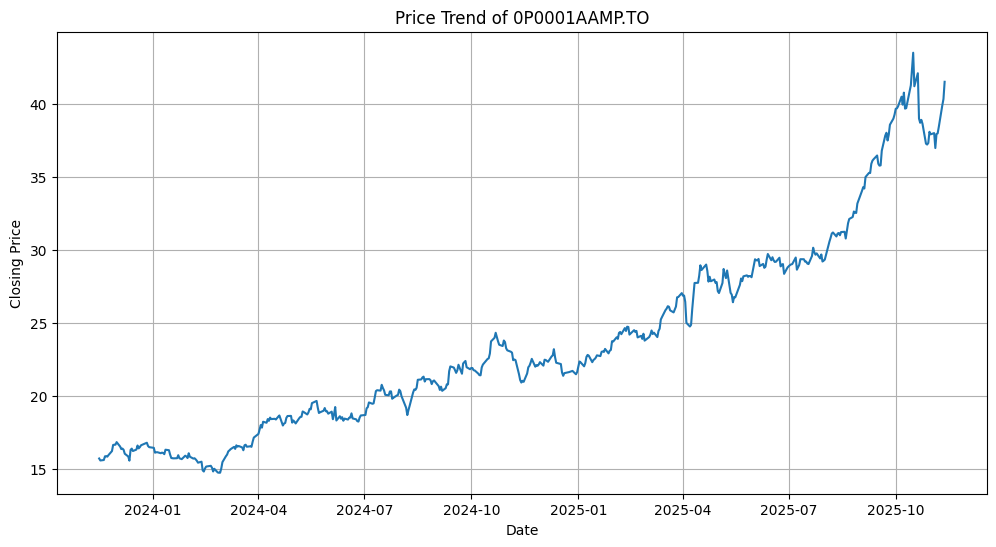

In [79]:
# plot the trend of one fund

plt.figure(figsize=(12, 6))
fund_df = fund_hist[fund_hist["ticker"] == fund_hist["ticker"].unique()[0]]
plt.plot(pd.to_datetime(fund_df["Date"]), fund_df["Close"])
plt.title(f"Price Trend of {fund_df['ticker'].iloc[0]}")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     3960.
Date:                Fri, 14 Nov 2025   Prob (F-statistic):          2.60e-238
Time:                        14:16:14   Log-Likelihood:                -1103.6
No. Observations:                 497   AIC:                             2211.
Df Residuals:                     495   BIC:                             2220.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -577.3148      9.552    -60.438      0.0

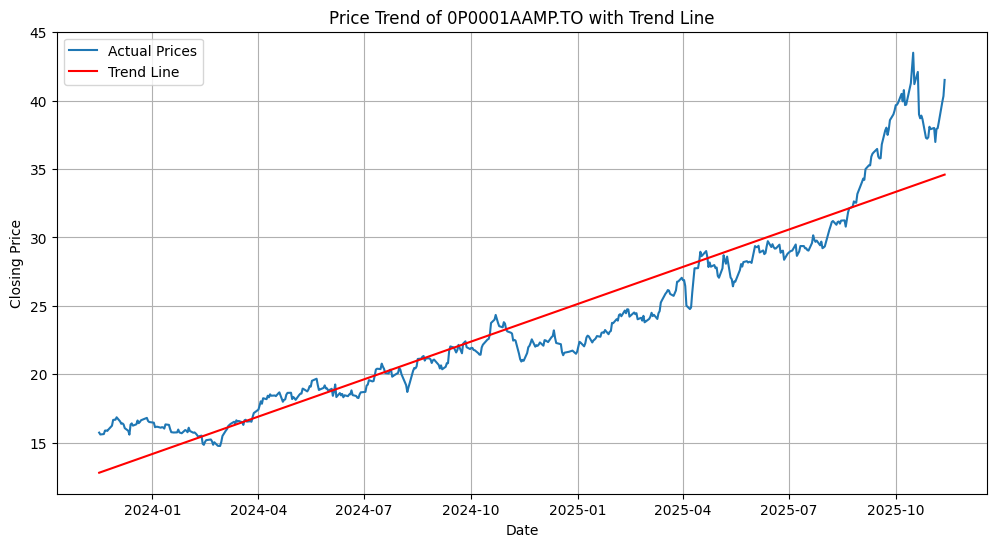

In [81]:
# use ols from statsmodels to analyze trend

X = pd.to_datetime(fund_df["Date"], utc=True).map(pd.Timestamp.timestamp)
y = fund_df["Close"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


# plot the regression line
plt.figure(figsize=(12, 6))
plt.plot(
    pd.to_datetime(fund_df["Date"], utc=True), fund_df["Close"], label="Actual Prices"
)
plt.plot(
    pd.to_datetime(fund_df["Date"], utc=True),
    model.predict(X),
    color="red",
    label="Trend Line",
)
plt.title(f"Price Trend of {fund_df['ticker'].iloc[0]} with Trend Line")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid()
plt.show()


/var/folders/vb/3jgmd9r10vj286ss2tn5s_9m0000gn/T/ipykernel_11504/2164712094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fund_df["MA50"] = fund_df["Close"].rolling(window=50).mean()
/var/folders/vb/3jgmd9r10vj286ss2tn5s_9m0000gn/T/ipykernel_11504/2164712094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fund_df["MA200"] = fund_df["Close"].rolling(window=200).mean()


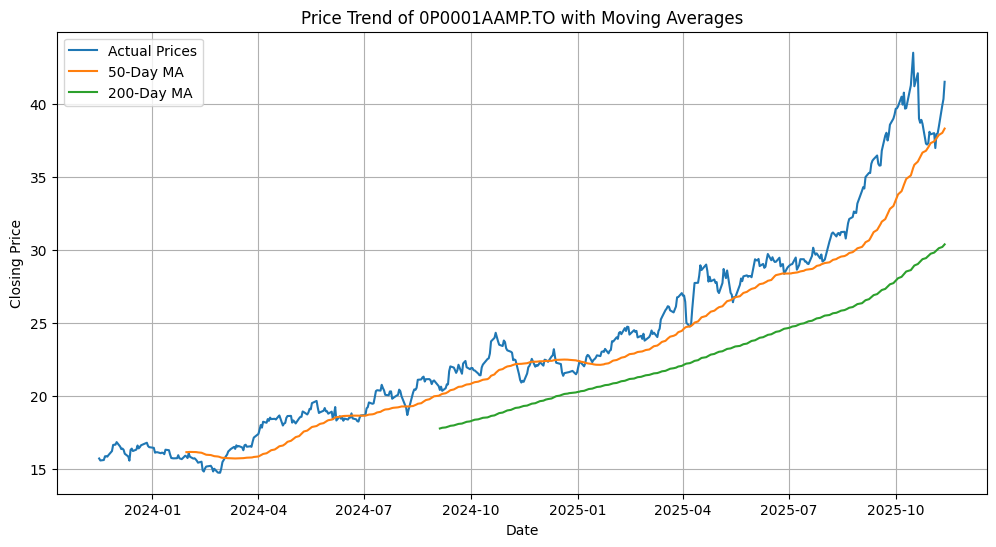

In [85]:
# add moving average 50 days and 200 days
fund_df["MA50"] = fund_df["Close"].rolling(window=50).mean()
fund_df["MA200"] = fund_df["Close"].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(fund_df["Date"], utc=True), fund_df["Close"], label="Actual Prices")
plt.plot(pd.to_datetime(fund_df["Date"], utc=True), fund_df["MA50"], label="50-Day MA")
plt.plot(pd.to_datetime(fund_df["Date"], utc=True), fund_df["MA200"], label="200-Day MA")
plt.title(f"Price Trend of {fund_df['ticker'].iloc[0]} with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid()
plt.show()


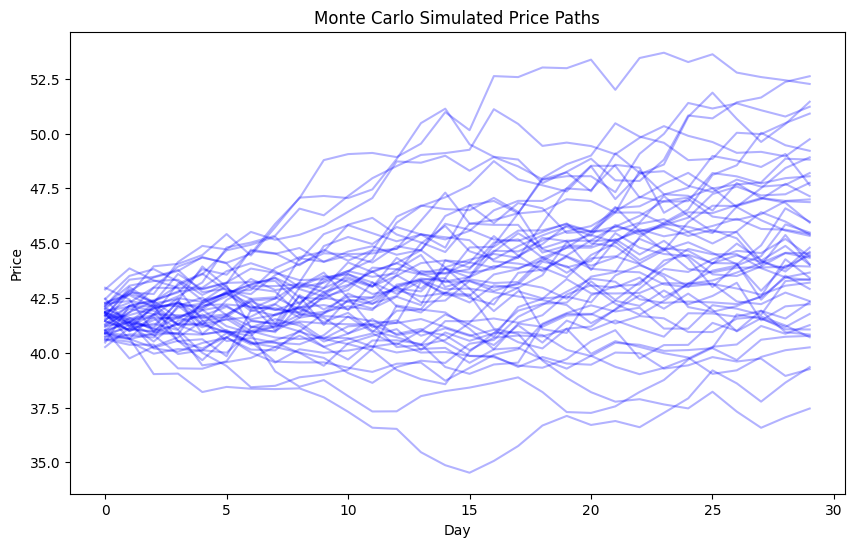

In [84]:
returns = fund_df["Close"].pct_change().dropna()

# Estimate parameters
mu = returns.mean()
sigma = returns.std()

S0 = fund_df["Close"].iloc[-1]  # Last known price
days = 30  # Number of days to simulate (e.g., 1 year)
simulations = 50  # Number of simulation paths

simulated_paths = np.zeros((simulations, days))
for i in range(simulations):
    prices = [S0]
    for _ in range(days):
        next_price = prices[-1] * np.exp(np.random.normal(mu, sigma))
        prices.append(next_price)
    simulated_paths[i] = prices[1:]

# Plot simulated price paths
plt.figure(figsize=(10, 6))
for i in range(simulations):
    plt.plot(simulated_paths[i], color="blue", alpha=0.3)
plt.title("Monte Carlo Simulated Price Paths")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()
